In [1]:
#importing necessary librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#getting data from csv file
df = pd.read_csv("flights.csv")
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#data overview
print("Describe:")
print(df.describe())
print("\nInfo:")
print(df.info())

Describe:
            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  1048575.0  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
mean      2015.0  1.694297e+00  1.382097e+01  3.953196e+00   2.256759e+03   
std          0.0  7.051508e-01  8.725656e+00  1.999436e+00   1.799166e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  1.000000e+00  6.000000e+00  2.000000e+00   7.550000e+02   
50%       2015.0  2.000000e+00  1.300000e+01  4.000000e+00   1.725000e+03   
75%       2015.0  2.000000e+00  2.100000e+01  6.000000e+00   3.485000e+03   
max       2015.0  3.000000e+00  3.100000e+01  7.000000e+00   9.794000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         1.048575e+06    1.009060e+06     1.009060e+06  1.008346e+06   
mean          1.322632e+03    1.333705e+03     1.133485e+01  1.665380e+01   
std           4.707748e+02    4.827415e+02     3.922372e+01  1.00

In [4]:
#removing unecessary data:
dat = df.copy(deep=True)
dat.drop(['FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','YEAR','CANCELLATION_REASON'], axis=1, inplace=True)

#removing cancelled and diverted flights
dat = dat[dat['CANCELLED'] == 0]
print(dat["CANCELLED"].value_counts()) #checking...
dat = dat[dat['DIVERTED'] == 0]
print(dat["DIVERTED"].value_counts()) #checking...

dat.drop(['CANCELLED'], axis=1, inplace=True)
dat.drop(['DIVERTED'], axis=1, inplace=True)

dat.head()

CANCELLED
0    1008048
Name: count, dtype: int64
DIVERTED
0    1005504
Name: count, dtype: int64


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,5,2354.0,-11.0,21.0,15.0,205.0,...,404.0,4.0,430,408.0,-22.0,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,10,2.0,-8.0,12.0,14.0,280.0,...,737.0,4.0,750,741.0,-9.0,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,20,18.0,-2.0,16.0,34.0,286.0,...,800.0,11.0,806,811.0,5.0,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,20,15.0,-5.0,15.0,30.0,285.0,...,748.0,8.0,805,756.0,-9.0,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,25,24.0,-1.0,11.0,35.0,235.0,...,254.0,5.0,320,259.0,-21.0,NaN,NaN,NaN,NaN,NaN


In [5]:
#Filling NaN:
#Note: Rows with ARRIVAL_DELAY < 0 have a delay of 0 in the remaining coulmns the rest will be interpolated

cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for i in cols:
    dat.loc[dat['ARRIVAL_DELAY'] < 0, i] = 0

dat["AIRLINE"] = dat["AIRLINE"].fillna(dat["AIRLINE"].mode())

In [6]:
#Bonus:
#Training on the data:

#training data frame:
train_df = dat.dropna()

#We will train only using colums that have a delay, limiting to 10000 for time

train_df = train_df[(train_df[cols[0]]>0)|(train_df[cols[1]]>0)|(train_df[cols[2]]>0)|(train_df[cols[3]]>0)|(train_df[cols[4]]>0)]

train_df = train_df.iloc[0:10000,:]

In [7]:
#Importing ML libs
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder as lenc
from sklearn.metrics import accuracy_score as AccScr


mymodel = RFC()

labeler = lenc()

train_df["AIRLINE"] = labeler.fit_transform(train_df["AIRLINE"]) #categorizing data

x = train_df.drop(cols,axis=1)

y = train_df[cols]

xtrn,xtst,ytrn,ytst = tts(x,y,random_state=42,train_size=0.65)

mymodel.fit(xtrn,ytrn)

ypred = mymodel.predict(xtst)

In [8]:
#Eval:
correct = 0

#importing regex
import re
    
for yt, yp in zip(ytst[:].values, ypred):
    val1 = ((re.sub(' +',' ',str(yt).replace("[","").replace("]","").replace(".",".0"))).strip().replace(" ",",")).split(",")
    val2 = ((re.sub(' +',' ',str(yp).replace("[","").replace("]","").replace(".",".0"))).strip().replace(" ",",")).split(",")
    for i in range(len(val1)):
        if val1[i] == val2[i] and val1[i]!="0.0" and val2[i]!="0.0":
            correct+=1
print(f"Accuracy: {correct/len(ytst)*100}%")

Accuracy: 10.114285714285714%


In [9]:
#interpolation
for i in cols:
    dat[i] = dat[i].fillna(dat[i].mean())

dat.head() #checking...

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,5,2354.0,-11.0,21.0,15.0,205.0,...,404.0,4.0,430,408.0,-22.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,4,AA,10,2.0,-8.0,12.0,14.0,280.0,...,737.0,4.0,750,741.0,-9.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,1,4,US,20,18.0,-2.0,16.0,34.0,286.0,...,800.0,11.0,806,811.0,5.0,3.973541,0.016636,5.282628,6.651744,1.028829
3,1,1,4,AA,20,15.0,-5.0,15.0,30.0,285.0,...,748.0,8.0,805,756.0,-9.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,1,4,AS,25,24.0,-1.0,11.0,35.0,235.0,...,254.0,5.0,320,259.0,-21.0,0.000000,0.000000,0.000000,0.000000,0.000000


Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


<Axes: >

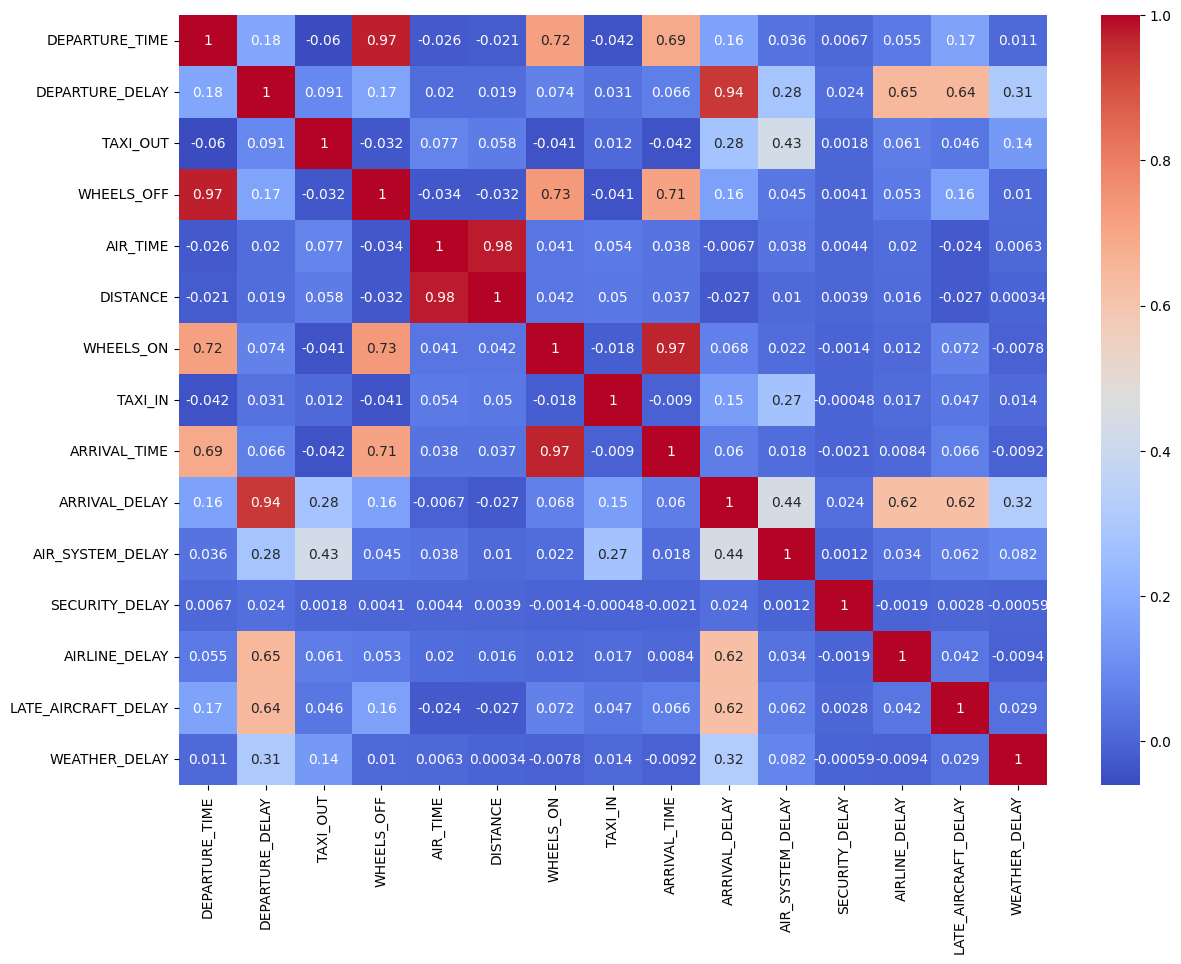

In [10]:
#Checking availabel columns
print(dat.columns)

#Checking correlation between vars:
#also temperoraly removing unecessary vars
tmp = dat.drop(['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE','SCHEDULED_TIME','ELAPSED_TIME','SCHEDULED_ARRIVAL'],inplace=False,axis=1)
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(tmp.corr(numeric_only=True), cmap="coolwarm", annot=True, ax=ax)

In [11]:
#Checking for std.dv:
print(dat.columns)

tmp2 = dat.drop(['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],inplace=False,axis=1) 
#removing interapolated data temporarly

tmp2.std(numeric_only=True)

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


MONTH                    0.704051
DAY                      8.669462
DAY_OF_WEEK              1.988990
SCHEDULED_DEPARTURE    470.003843
DEPARTURE_TIME         482.608833
DEPARTURE_DELAY         38.949475
TAXI_OUT                10.053595
WHEELS_OFF             482.952098
SCHEDULED_TIME          74.784925
ELAPSED_TIME            73.948180
AIR_TIME                71.869516
DISTANCE               595.653928
WHEELS_ON              503.151120
TAXI_IN                  6.335567
SCHEDULED_ARRIVAL      485.563845
ARRIVAL_TIME           506.882025
ARRIVAL_DELAY           42.093672
dtype: float64

Text(0.5, 1.0, 'ELAPSED_TIME')

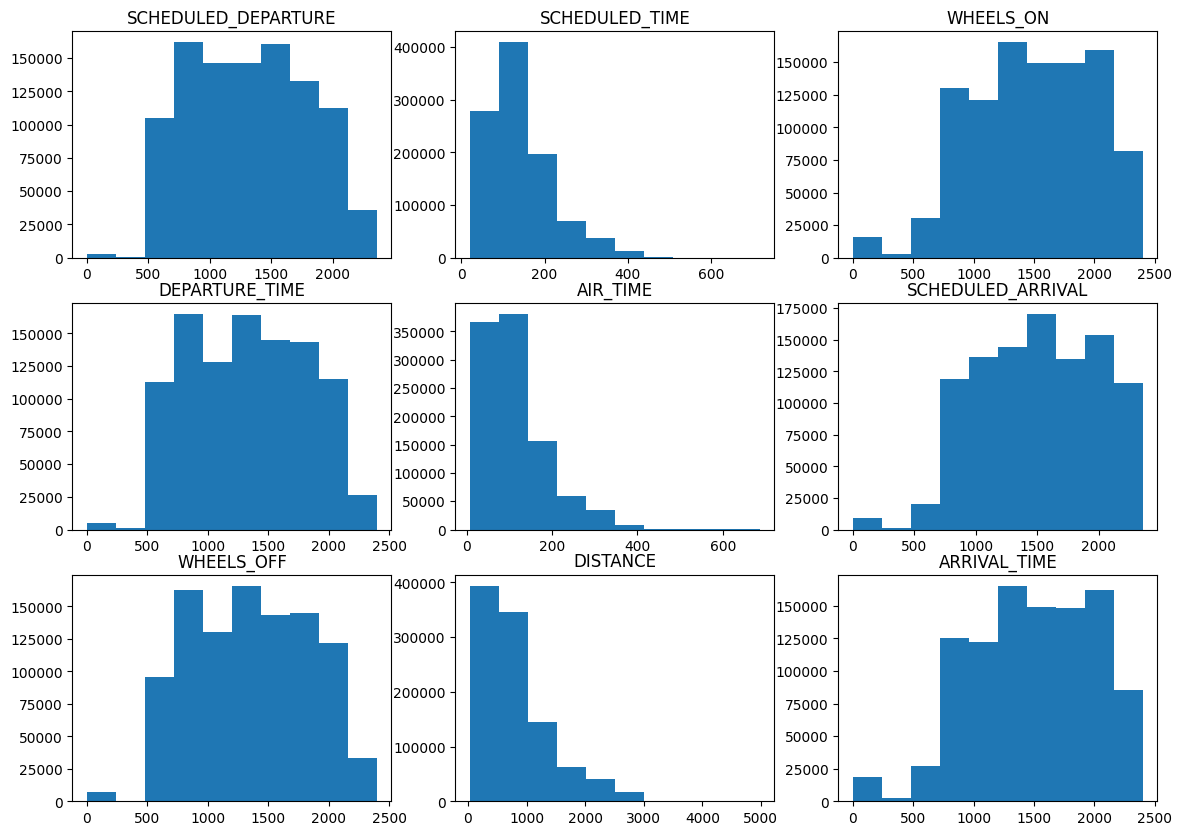

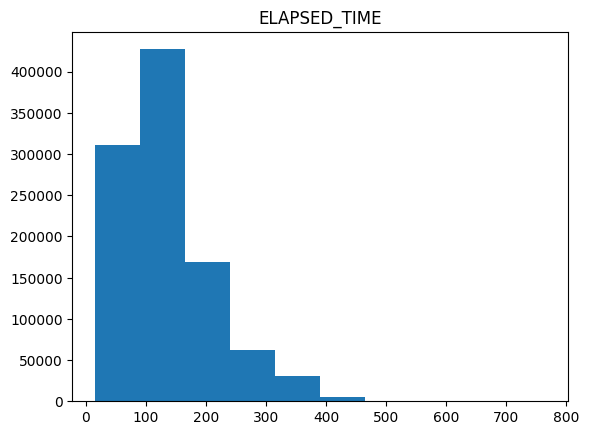

In [12]:
#graphing interessting stds:

inter = 10

fig,ax = plt.subplots(3,3)
fig.set_size_inches(14,10)

my_cols = ["SCHEDULED_DEPARTURE", "DEPARTURE_TIME", "WHEELS_OFF", "SCHEDULED_TIME", "AIR_TIME", "DISTANCE", "WHEELS_ON", "SCHEDULED_ARRIVAL", "ARRIVAL_TIME"]

c = 0
for i in range(0,9):
    if i%3 == 0 and i != 0:
        c+=1
    #print(f"{i-c*3} , {i//3}")
    ax[i-c*3,i//3].hist(dat[my_cols[i]])
    ax[i-c*3,i//3].set_title(my_cols[i])

fig2,ax2 = plt.subplots(1,1)
ax2.hist(dat["ELAPSED_TIME"])
ax2.set_title("ELAPSED_TIME")

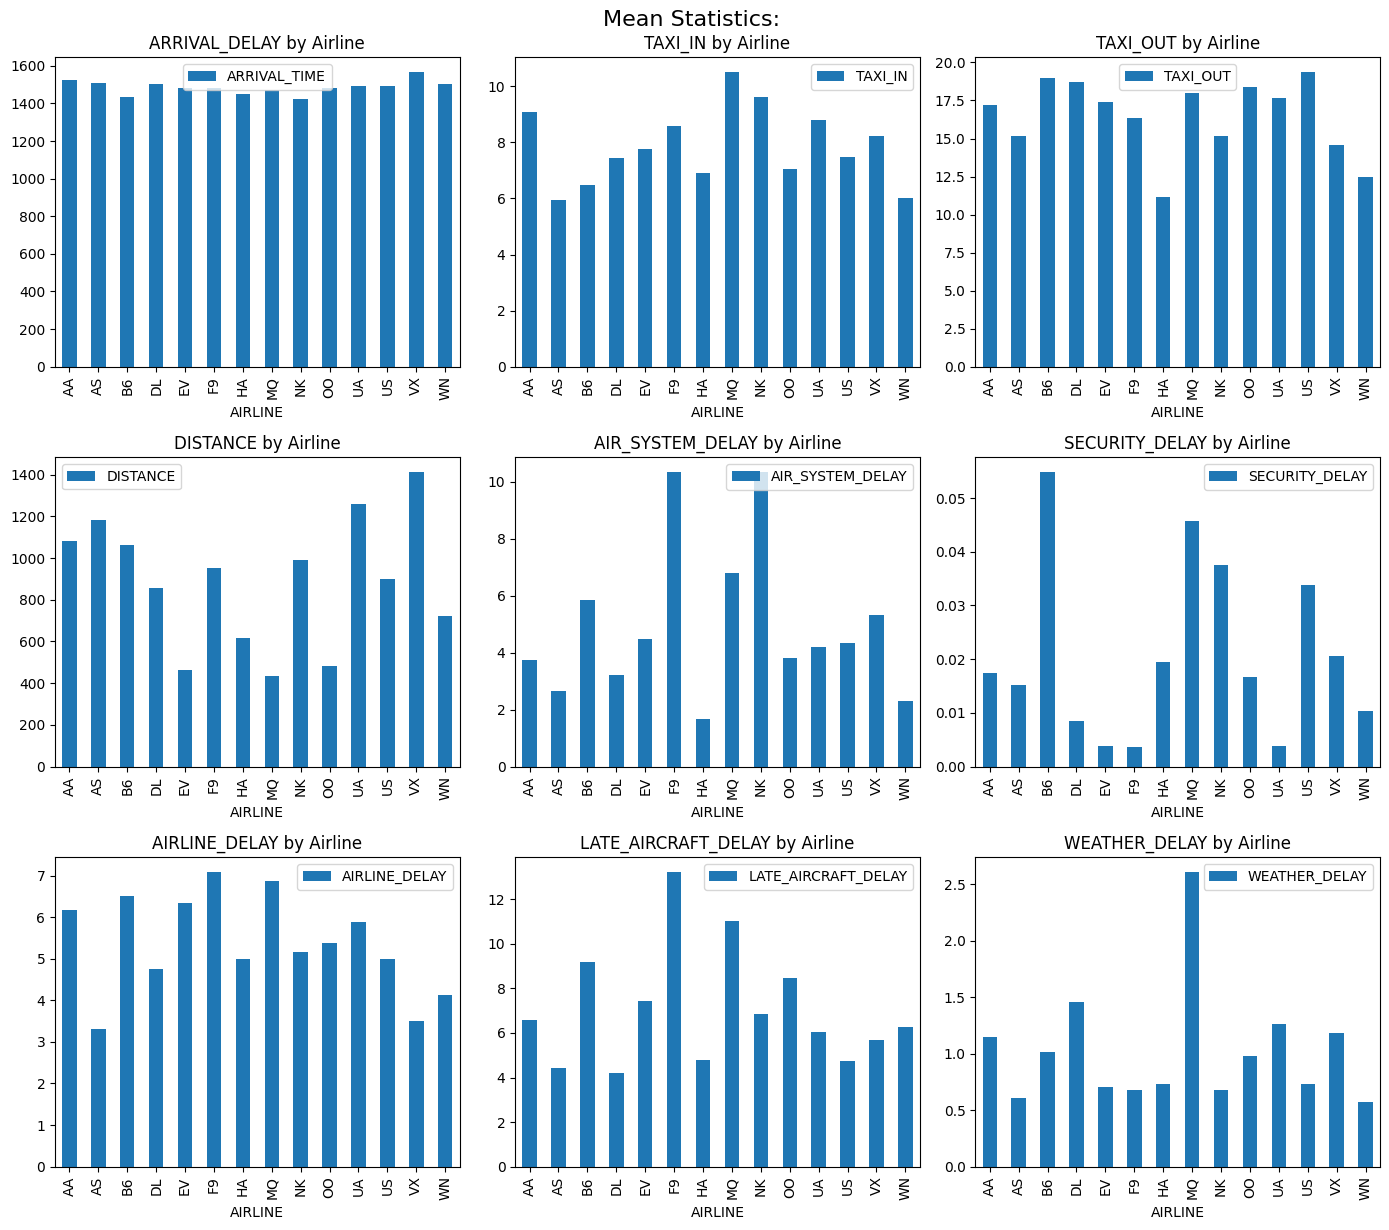

In [13]:
#Analysis:

#Note: It seems most of the data is symmmetrical except for SCHEDULED_TIME, AIR_TIME, DISTANCE, ELAPSED_TIME

#Mean graphs of:

fig,ax = plt.subplots(3,3)
fig.set_size_inches(14,12.5)
fig.suptitle("Mean Statistics: ", fontsize=16)

#1 - ARRIVAL_DELAY by Airline

dat[["AIRLINE","ARRIVAL_TIME"]].groupby("AIRLINE").mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title("ARRIVAL_DELAY by Airline")

#2 - TAXI_IN by Airline

dat[["AIRLINE","TAXI_IN"]].groupby("AIRLINE").mean().plot.bar(ax=ax[0,1])
ax[0,1].set_title("TAXI_IN by Airline")

#3 - TAXI_OUT by Airline

dat[["AIRLINE","TAXI_OUT"]].groupby("AIRLINE").mean().plot.bar(ax=ax[0,2])
ax[0,2].set_title("TAXI_OUT by Airline")

#4 - DISTANCE by Airline

dat[["AIRLINE","DISTANCE"]].groupby("AIRLINE").mean().plot.bar(ax=ax[1,0])
ax[1,0].set_title("DISTANCE by Airline")

#5 - AIR_SYSTEM_DELAY by Airline

dat[["AIRLINE","AIR_SYSTEM_DELAY"]].groupby("AIRLINE").mean().plot.bar(ax=ax[1,1])
ax[1,1].set_title("AIR_SYSTEM_DELAY by Airline")

#6 - SECURITY_DELAY by Airline

dat[["AIRLINE","SECURITY_DELAY"]].groupby("AIRLINE").mean().plot.bar(ax=ax[1,2])
ax[1,2].set_title("SECURITY_DELAY by Airline")

#7 - AIRLINE_DELAY by Airline

dat[["AIRLINE","AIRLINE_DELAY"]].groupby("AIRLINE").mean().plot.bar(ax=ax[2,0])
ax[2,0].set_title("AIRLINE_DELAY by Airline")

#8 - LATE_AIRCRAFT_DELAY by Airline

dat[["AIRLINE","LATE_AIRCRAFT_DELAY"]].groupby("AIRLINE").mean().plot.bar(ax=ax[2,1])
ax[2,1].set_title("LATE_AIRCRAFT_DELAY by Airline")

#9 - WEATHER_DELAY by Airline

dat[["AIRLINE","WEATHER_DELAY"]].groupby("AIRLINE").mean().plot.bar(ax=ax[2,2])
ax[2,2].set_title("WEATHER_DELAY by Airline")

fig.tight_layout()